In [1]:
import numpy as np
import pickle as pkl
from pprint import pprint
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

plt.ion()

In [2]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/2024May28 No window data /OneDrive_1_6-17-2024/Run_8_TBS_Experiment_ecr_results/'

In [3]:
os.chdir(dr)

In [4]:
dr1=dr+'230601 RUN 8 Wells 1-3'
dr2=dr+'230602 RUN 8 Wells 4-6'

filenames=os.listdir(dr1)
filenames.remove('.DS_Store')
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))

sorted_filenames_updated1=['230601 RUN 8 Wells 1-3/'+filename + '/data.raw_20240521_16h16m.pkl' for filename in sorted_filenames]

filenames=os.listdir(dr2)
filenames.remove('.DS_Store')
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))
sorted_filenames_updated2=['230602 RUN 8 Wells 4-6/'+filename + '/data.raw_20240521_16h16m.pkl' for filename in sorted_filenames]
sorted_filenames_updated=sorted_filenames_updated1+sorted_filenames_updated2

In [5]:
len(sorted_filenames_updated)

36

In [6]:
sorted_filenames_updated

['230601 RUN 8 Wells 1-3/#1 (baseline)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#2 (well #1 post stim 1)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#3 (well #1 post stim 2)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#4 (well #1 post stim 3)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#5 (well #1 post stim 4)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#6 (well #2 post stim 1)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#7 (well #2 post stim 2)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#8 (well #2 post stim 3)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#9 (well #2 post stim 4)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#10 (well #3 post stim 1)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#11 (well #3 post stim 2)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#12 (well #3 post stim 3)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#13 (well #

In [8]:
df = pd.read_csv('/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/April 19 2024/Time-file.csv')
df['time'] = pd.to_datetime(df['Unnamed: 1'].astype(str) + ' ' + df['Unnamed: 2'].astype(str), errors='coerce')

for i in df.loc[df['Unnamed: 2'].isnull(),'time'].index:
    df.loc[i,'time'] = df.loc[i-1,'time']+pd.Timedelta(10,'min')

well=3
stimulus_time=df[df[str(well)]==True]['time']
time=df[df['Unnamed: 2'].notna()]['time']
time_diff = [(t - time[0]).total_seconds() / 60 for t in time]
stimulus_time_diff = [(t - time[0]).total_seconds() / 60 for t in stimulus_time]

In [8]:
#len(time_diff)

36

In [7]:
def filter_matrix_TC(data, well):

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well]['win_0']['adj_matrix_predicted']
    votes = data[well]['win_0']['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well]['win_0']['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

In [12]:
well='well003'

In [13]:
all_adj = []
num_vertices = []
for i in range(len(sorted_filenames_updated)):
    with open(sorted_filenames_updated[i], 'rb') as f:
        data = pkl.load(f)
    adj = filter_matrix_TC(data, well)
    all_adj.append(adj)
    num_vertices.append(adj.shape[0])
    print(i,sum(sum(adj)), adj.shape[0] )


0 22163 936
1 23405 935
2 19708 934
3 20723 940
4 11436 909
5 21830 930
6 21525 944
7 20830 935
8 23102 939
9 22506 925
10 13730 925
11 23617 932
12 11850 913
13 12899 912
14 13569 896
15 12214 907
16 10777 911
17 22986 937
18 21397 931
19 7112 922
20 6556 920
21 10245 913
22 955 687
23 12045 926
24 11202 918
25 4195 929
26 7815 919
27 23640 928
28 3794 922
29 22941 935
30 20822 941
31 21955 934
32 10252 913
33 23458 932
34 8886 903
35 9049 909


/Users/tianyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


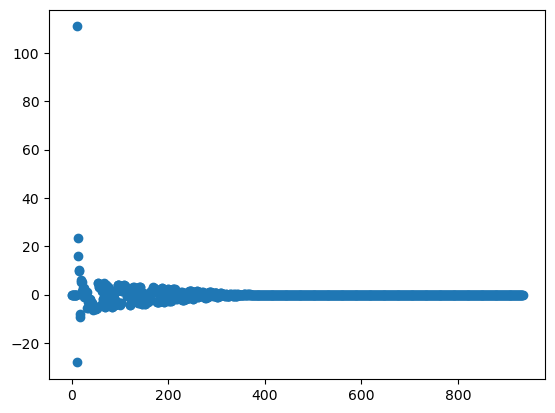

In [14]:
s,u=np.linalg.eig(all_adj[1])
plt.scatter(range(all_adj[1].shape[0]),s)

In [15]:
## add zeros to the adj mat such that they have the same dims 
dim = max(num_vertices) # Max number of vertices to determine dimension
m=len(all_adj)
adj_aug = np.zeros((m, dim, dim))  # Pre-allocate a zero matrix of the desired size
for i in range(m):
    ma = all_adj[i]  
    l = ma.shape[0]  
    adj_aug[i, :l, :l] = ma 

In [23]:
graph_matching=False

from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline

count = len([x for x in time_diff if x < 400])
for i in range(0, count):
    adj_gm[i] = adj_aug[i]
    #print(time_diff[i])

## only match between two days
res = quadratic_assignment(adj_aug[count-1],adj_aug[count],options = {'maximize': True})
perm = res['col_ind']
adj_gm[count] = adj_aug[count][perm][:,perm]

for i in range(count, m):
    adj_gm[i] = adj_aug[i][perm][:,perm]
    #print(time_diff[i])


In [16]:
graph_matching=True

from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline
for i in range(1, m):
    res = quadratic_assignment(adj_gm[i-1],adj_aug[i],options = {'maximize': True})
    perm = res['col_ind']
    ofv=res['fun']
    fun_I = np.trace(adj_aug[i].T  @ adj_gm[i-1] )
    adj_gm[i]=adj_aug[i][perm][:,perm]
    before_norm = LA.norm(adj_aug[i] - adj_gm[i-1], 'fro')
    after_norm = LA.norm(adj_gm[i] - adj_gm[i-1], 'fro')

     # Printing the before and after norms to see the difference
    print(f"Frob diff before GM: {before_norm}, After GM: {after_norm},OFV before GM: {fun_I}, After GM: {ofv}")

Frob diff before GM: 200.47942537826668, After GM: 125.45915670049756,OFV before GM: 2688.0, After GM: 14914.0
Frob diff before GM: 202.75354497517424, After GM: 124.65552534885889,OFV before GM: 1002.0, After GM: 13787.0
Frob diff before GM: 195.99234678935807, After GM: 121.83185133617563,OFV before GM: 1009.0, After GM: 12794.0
Frob diff before GM: 177.70481141488546, After GM: 122.5275479229059,OFV before GM: 290.0, After GM: 8573.0
Frob diff before GM: 180.033330247485, After GM: 124.73171208638162,OFV before GM: 427.0, After GM: 8854.0
Frob diff before GM: 203.2707553978191, After GM: 130.05767951182276,OFV before GM: 1018.0, After GM: 13220.0
Frob diff before GM: 203.18218425836454, After GM: 133.41289293018121,OFV before GM: 536.0, After GM: 12278.0
Frob diff before GM: 205.53831759552767, After GM: 130.65221008463652,OFV before GM: 843.0, After GM: 13431.0
Frob diff before GM: 210.72731194603134, After GM: 123.76590806841762,OFV before GM: 601.0, After GM: 15145.0
Frob diff be

In [17]:
choosen_time_points=range(m)
from scipy.linalg import orthogonal_procrustes
tm=choosen_time_points

D=np.zeros([len(tm),len(tm)])

In [19]:
import graspologic.utils as graspologic_utils
from graspologic.embed import AdjacencySpectralEmbed

In [32]:
for i in range(len(tm)):
    for j in range(len(tm)):
        prod=adj_gm[choosen_time_points[i]] * adj_gm[choosen_time_points[j]]
        [a,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
        n=len(ind)
        print(i,j,n)
        glist=np.zeros([len(choosen_time_points),len(ind),len(ind)])
        glist[i]=adj_gm[choosen_time_points[i]][ind][:,ind]
        glist[j]=adj_gm[choosen_time_points[j]][ind][:,ind]
        print(graspologic_utils.is_fully_connected(glist[i]))

        ed=2
        Xhat_list=np.zeros([len(tm),n,2*ed])
        ase = AdjacencySpectralEmbed(n_components=ed)
        Xhat, Yhat = ase.fit_transform(glist[i])
        Xhat_list[i][:,list(np.arange(ed))]=Xhat
        Xhat_list[i][:,list(np.arange(ed,2*ed))]=Yhat

        Xhat, Yhat = ase.fit_transform(glist[j])
        Xhat_list[j][:,list(np.arange(ed))]=Xhat
        Xhat_list[j][:,list(np.arange(ed,2*ed))]=Yhat

        R, sca = orthogonal_procrustes(Xhat_list[i] , Xhat_list[j] )
        D[i,j]=LA.norm(Xhat_list[i] @ R -  Xhat_list[j],2)**2/n  #Frobenius norm

0 0 384
True
0 1 370
True
0 2 323
True
0 3 311
True
0 4 259
True
0 5 279
True
0 6 285
True
0 7 285
True
0 8 278
True
0 9 277
True
0 10 251
True
0 11 271
True
0 12 243
True
0 13 243
True
0 14 240
True
0 15 228
True
0 16 225
True
0 17 246
True
0 18 248
True
0 19 207
True
0 20 202
True
0 21 215
True
0 22 118
True
0 23 182
True
0 24 179
True
0 25 155
True
0 26 160
True
0 27 202
True
0 28 151
True
0 29 186
True
0 30 186
True
0 31 187
True
0 32 163
True
0 33 198
True
0 34 156
True
0 35 157
True
1 0 370
True
1 1 397
True
1 2 356
True
1 3 333
True
1 4 263
True
1 5 284
True
1 6 286
True
1 7 289
True
1 8 282
True
1 9 280
True
1 10 251
True
1 11 269
True
1 12 241
True
1 13 241
True
1 14 234
True
1 15 225
True
1 16 223
True
1 17 244
True
1 18 248
True
1 19 208
True
1 20 203
True
1 21 214
True
1 22 120
True
1 23 184
True
1 24 175
True
1 25 156
True
1 26 168
True
1 27 203
True
1 28 157
True
1 29 191
True
1 30 191
True
1 31 192
True
1 32 164
True
1 33 200
True
1 34 153
True
1 35 157
True
2 0 323
True

In [21]:
from graspologic.datasets import load_drosophila_right
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
import graspologic.utils as graspologic_utils

In [22]:
from graspologic.embed import AdjacencySpectralEmbed
from scipy.linalg import orthogonal_procrustes

<AxesSubplot:title={'center':'Distance matrix between time points'}>

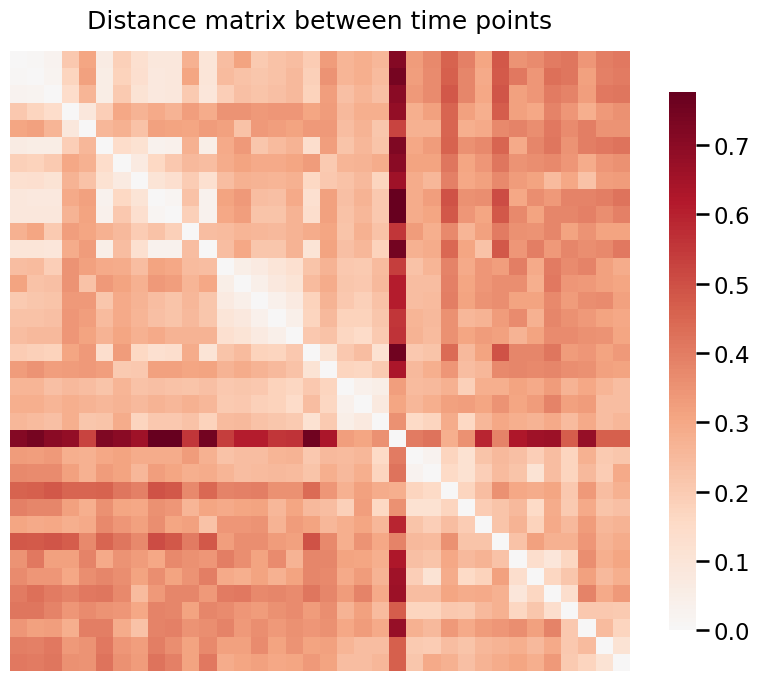

In [33]:
from graspologic.plot import heatmap
heatmap(D, title="Distance matrix between time points")

Text(0, 0.5, 'eigen value')

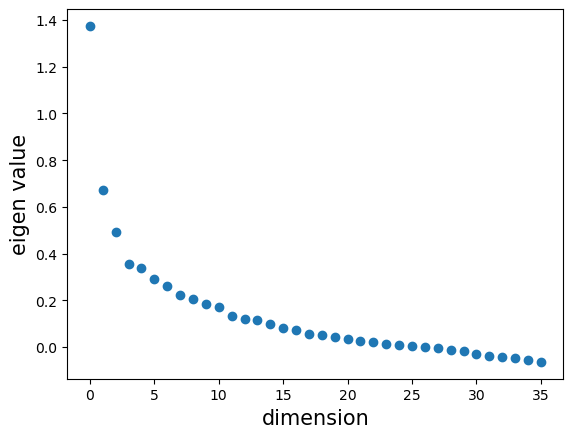

In [34]:
J=np.ones([len(tm),len(tm)])/len(tm)
I=np.eye(len(tm))
P=I-J

H=(-1/2)*P@D@P
w,v=LA.eig(H)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.scatter(range(len(tm)),w) 
#plt.title('scree plot for MDS')
plt.xlabel('dimension',fontsize=15)
plt.ylabel('eigen value',fontsize=15)

In [25]:
w

array([ 1.74046949e+00,  8.28883942e-01,  3.14253978e-01,  1.84987936e-01,
        1.43554983e-01,  1.22806246e-01,  9.03660538e-02,  6.62099614e-02,
        3.97828961e-02,  3.53970802e-02,  2.44297060e-02,  2.32835153e-02,
        2.27293730e-02,  1.99636514e-02,  1.72714471e-02,  1.40755141e-02,
        1.20305100e-02,  9.41938006e-03,  6.28029237e-03,  6.08847995e-03,
        5.11340481e-03,  4.43763341e-03,  3.78199357e-03,  1.79172828e-03,
        1.12637803e-03,  8.41197001e-04,  5.47655965e-17, -4.68981778e-04,
       -5.75583360e-04, -3.50382192e-03, -3.78873912e-03, -5.07613069e-03,
       -7.44565934e-03, -1.00663138e-02, -1.38428546e-02, -1.73416198e-02])

In [35]:
d=3
MDS=v[:,:d] @ np.diag(np.sqrt(w[:d]))

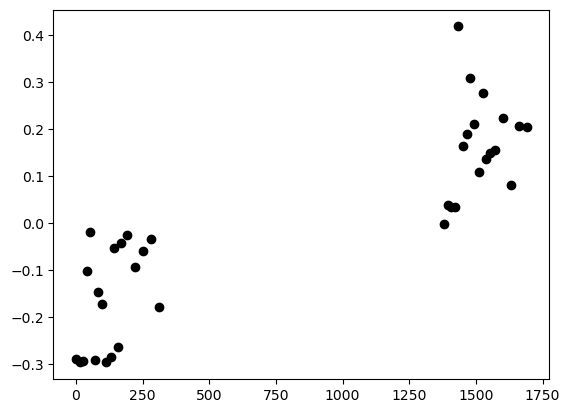

In [37]:
plt.scatter(time_diff,MDS[:,0],color='black')

Text(0, 0.5, 'dim 2')

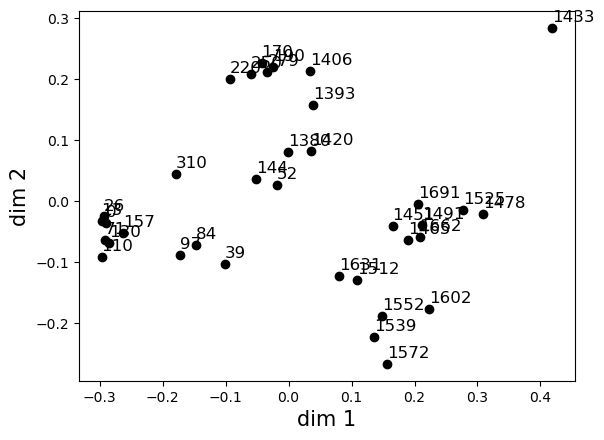

In [38]:
plt.scatter(MDS[:,0],-MDS[:,1],color='black')
for i in range(len(tm)):
    plt.text(MDS[i,0],-MDS[i,1]+0.01,int(time_diff[choosen_time_points[i]]), fontsize=12)
plt.xlabel("dim 1",fontsize=15)
plt.ylabel("dim 2",fontsize=15)

In [39]:
from sklearn.manifold import Isomap

In [44]:
embedding = Isomap(n_neighbors=5,n_components=1)
iso = embedding.fit_transform(MDS)

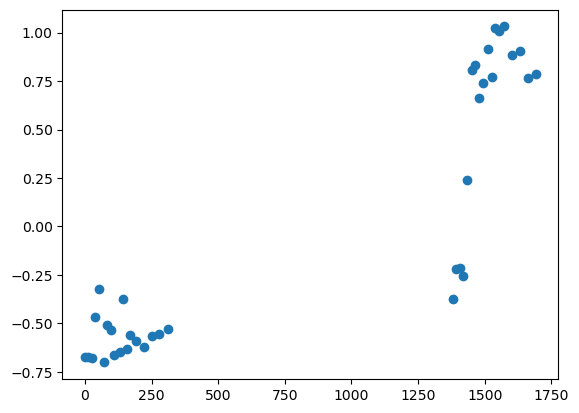

In [45]:
plt.scatter(time_diff,iso)

In [ ]:
import piecewise_regression

In [49]:
ms = piecewise_regression.ModelSelection(time_diff, iso[:,0], max_breakpoints=6)

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 
Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 
Running fit with n_breakpoint = 4 . . 
Running fit with n_breakpoint = 5 . . 
Running fit with n_breakpoint = 6 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                     -76.13         True       3.5598 
1                    -86.895         True       2.1632 
2                    -144.19         True      0.36097 
3                    -147.02         True       0.2734 
4                                   False              
5                                   False              
6                                   False              

Min BIC (Bayesian Information Criterion) suggests best model


In [51]:
pw_fit = piecewise_regression.Fit(time_diff, iso[:,0], n_breakpoints=2)

In [52]:
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       36
No. Model Parameters                    6
Degrees of Freedom                     30
Res. Sum of Squares              0.360973
Total Sum of Squares               16.145
R Squared                        0.977642
Adjusted R Squared               0.973016
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const              -0.603057       0.0291      -20.724      2.49e-19     -0.66249     -0.54363
alpha1           0.000236788     5.32e-05       4.4499       0.00011   0.00012811   0.00034546
beta1              0.0368327       0.0117        3.146             -     0.012922     0.060743
beta2             -0.0368523       0.0117      -3.1457             -    -0.060778    -0.012927
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       36\nNo. Model Parameters                    6\nDegrees of Freedom                     30\nRes. Sum of Squares              0.360973\nTotal Sum of Squares               16.145\nR Squared                        0.977642\nAdjusted R Squared               0.973016\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst              -0.603057       0.0291      -20.724      2.49e-19     -0.66

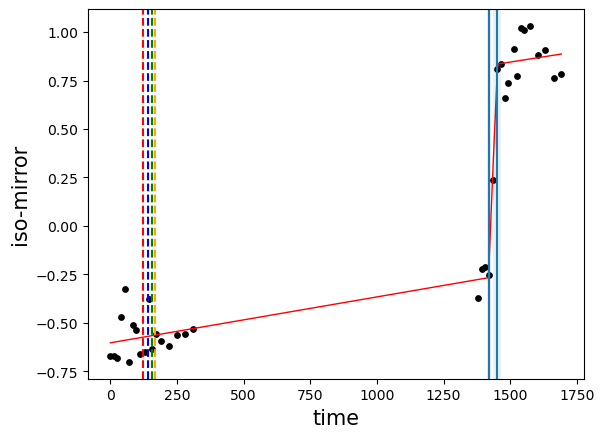

In [53]:
### result for using iso-mirror
pw_fit.plot_data(color='black',s=15)
pw_fit.plot_fit(color="red", linewidth=1)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("time",fontsize=15)
plt.ylabel("iso-mirror",fontsize=15)
#plt.title('Well 34')
#for i in range(30):
#    plt.text(day[i]-1,iso[i,0]+0.01,str(int(day[i])), fontsize=7)
#plt.savefig('well_34_approx_FC.pdf',bbox_inches='tight')

plt.axvline(x=stimulus_time_diff[0], color='red', linestyle='--', label='stimu 1')
plt.axvline(x=stimulus_time_diff[1], color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=stimulus_time_diff[2], color='green', linestyle='--', label='stimu 3')
plt.axvline(x=stimulus_time_diff[3], color='orange', linestyle='--', label='stimu 4')

plt.show()
plt.close()

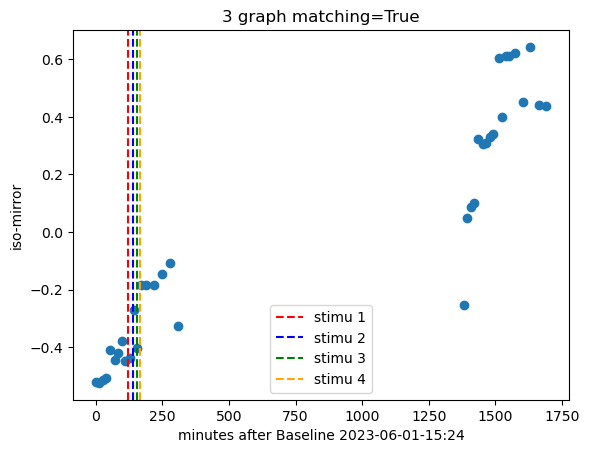

In [65]:

# Plot the scatter plot
plt.scatter(time_diff,iso)

# Add vertical lines
plt.axvline(x=stimulus_time_diff[0], color='red', linestyle='--', label='stimu 1')
plt.axvline(x=stimulus_time_diff[1], color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=stimulus_time_diff[2], color='green', linestyle='--', label='stimu 3')
plt.axvline(x=stimulus_time_diff[3], color='orange', linestyle='--', label='stimu 4')

# Set the x-axis label and y-axis label
plt.xlabel('minutes after Baseline 2023-06-01-15:24')
plt.ylabel('iso-mirror')

# Add a title
plt.title(str(well)+' graph matching='+str(graph_matching))

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [167]:
time

[1380.45,
 1393.6666666666667,
 1406.8833333333334,
 1420.1166666666666,
 1433.3666666666666,
 1451.8,
 1465.0833333333333,
 1478.3666666666666,
 1491.65,
 1512.6166666666666,
 1525.8666666666666,
 1539.1,
 1552.35,
 1572.4833333333333,
 1602.3333333333333,
 1631.4,
 1662.1166666666666,
 1691.5]

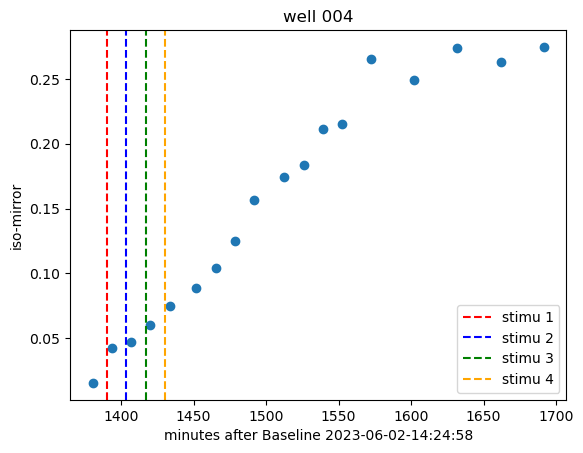

In [149]:
# Plot the scatter plot
plt.scatter(time[18:], -iso[18:])

# Add vertical lines
plt.axvline(x=stimulus_time_diff[0], color='red', linestyle='--', label='stimu 1')
plt.axvline(x=stimulus_time_diff[1], color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=stimulus_time_diff[2], color='green', linestyle='--', label='stimu 3')
plt.axvline(x=stimulus_time_diff[3], color='orange', linestyle='--', label='stimu 4')

# Set the x-axis label and y-axis label
plt.xlabel('minutes after Baseline 2023-06-02-14:24:58')
plt.ylabel('iso-mirror')

# Add a title
plt.title('well 004')

# Add a legend
plt.legend()

# Show the plot
plt.show()
